In [26]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:
df = pd.read_json("results.jsonl", lines=True)
print(len(df))
df.head()

631


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,402ac0f6ae24febd83b5d3889c958f02114ce7a5,oiled-lulu,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,1.5,cot/excellent-format-thought.txt,cq.txt,auto-interweave/cot.json,...,59.0,299,182.498328,494.152752,0,7.0,22.0,73.00,3784,cot
1,03e337dfad126e748bc3ea3f1fb62bd593b0d4c0,chill-stud,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,1.5,cot/format-thought.txt,cq.txt,auto-interweave/cot.json,...,53.0,299,279.394649,738.382845,0,4.0,15.0,55.00,4352,cot
2,79ad76530b1354b553f0372c3d91fd7bb1be51b9,lairy-ambo,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,1.5,cot/excellent-format-thought.txt,cq.txt,auto-interweave/cot.json,...,1.0,299,65.672241,199.380415,0,1.0,6.0,30.00,1724,cot
3,0f83febdb0a0ea90d43659380291370f662d8176,blame-cwms,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,1.5,cot/format-thought.txt,cq.txt,auto-interweave/cot.json,...,23.0,298,172.214765,330.646292,0,5.0,29.0,148.75,2347,cot
4,86a853b3b1f365ad9b2f496fe889e6731d03df27,quack-jags,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.7,cot/excellent-format-thought.txt,cq.txt,auto-interweave/cot.json,...,0.0,299,0.010033,0.129141,0,0.0,0.0,0.00,2,cot


In [28]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "name",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [29]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,0.1,ccot/excellent-format-thought.txt,cq.txt,auto-interweave/ccot.json,0,1,0.003333,0.003333,0.01,0.010000,...,0.0,299,3.789298,12.840232,0,0.0,0.0,2.0,165,ccot
1,0.1,ccot/excellent-format-thought.txt,cq.txt,auto-interweave/ccot.json,0,2,0.003333,0.003333,0.01,0.010000,...,4.0,299,1.719064,2.539884,0,1.0,1.0,1.0,27,ccot
2,0.1,ccot/excellent-format-thought.txt,cq.txt,auto-interweave/ccot.json,0,3,0.003333,0.003333,0.01,0.010000,...,0.0,299,0.414716,0.691694,0,0.0,0.0,1.0,5,ccot
3,0.5,ccot/excellent-format-thought.txt,cq.txt,auto-interweave/ccot.json,0,1,0.003333,0.003333,0.01,0.010000,...,0.0,299,4.193980,36.488793,0,0.0,0.0,0.0,440,ccot
4,0.5,ccot/excellent-format-thought.txt,cq.txt,auto-interweave/ccot.json,0,2,0.036667,0.045556,0.11,0.136667,...,62.0,287,1.787456,8.133939,0,0.0,0.0,0.0,66,ccot


In [30]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,params.run
3,ccot,ccot/excellent-format-thought.txt,cq.txt,auto-interweave/ccot.json,0,1.0,"(1, 3)"
5,ccot,ccot/excellent-format-thought.txt,cq.txt,auto-interweave/ccot.json,0,2.0,"(3, 3)"
11,ccot,ccot/excellent-format-thought.txt,cq.txt,auto-interweave/ccot.json,1,2.0,"(2,)"
15,ccot,ccot/excellent-format-thought.txt,cq.txt,auto-interweave/ccot.json,2,1.0,"(1, 3)"
17,ccot,ccot/excellent-format-thought.txt,cq.txt,auto-interweave/ccot.json,2,2.0,"(3,)"
...,...,...,...,...,...,...,...
189,direct,direct/excellent-format-few.txt,cq.txt,auto-interweave/direct.json,0,0.1,"(1, 2, 3, 3)"
205,direct,direct/excellent-format-few.txt,cq.txt,auto-interweave/direct.json,2,2.0,"(2,)"
211,direct,direct/excellent-format-few.txt,cq.txt,auto-interweave/direct.json,3,2.0,"(2,)"
217,direct,direct/excellent-format-few.txt,cq.txt,auto-interweave/direct.json,6,2.0,"(2,)"


In [31]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [32]:
df['params.qa.system_prompt'].unique()

array(['ccot/excellent-format-thought', 'ccot/format-thought',
       'cot/excellent-format-thought', 'cot/format-thought',
       'cte/excellent-format-triplets-few', 'cte/format-triplets-few',
       'direct/excellent-format-few', 'direct/format-few'], dtype=object)

In [33]:
avg_df = df.groupby(target_param_cols)[metric_cols].mean().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
0,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.1,0.003333,0.003333,0.010000,0.010000,...,1.333333,1.333333,299.000000,1.974359,5.357270,0.0,0.333333,0.333333,1.333333,65.666667
1,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.5,0.014444,0.017407,0.043333,0.052222,...,14.000000,20.666667,295.000000,2.370624,15.942028,0.0,0.000000,0.000000,0.333333,180.333333
2,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.7,0.162222,0.192167,0.313333,0.363803,...,32.250000,62.666667,244.000000,18.928288,21.501977,0.0,5.333333,14.000000,25.833333,171.333333
3,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,1.0,0.006667,0.006667,0.010000,0.010000,...,15.500000,16.500000,298.000000,16.554266,48.316282,0.0,0.500000,3.000000,11.000000,565.000000
4,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,1.5,0.068889,0.084676,0.200000,0.245363,...,46.416667,74.333333,274.666667,251.561357,455.682502,0.0,15.916667,61.666667,270.833333,3188.666667


In [34]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
137,cte,cte/excellent-format-triplets-few,cq,auto-interweave/cte,0,0.1,0.580000,0.655069,0.670000,0.742301,...,76.000000,227.000000,105.000000,59.485714,34.139734,0.000000,38.000000,55.000000,84.000000,160.000000
191,direct,direct/excellent-format-few,cq,auto-interweave/direct,0,0.7,0.396667,0.481668,0.460000,0.538380,...,6.416667,11.000000,162.000000,5.329591,4.885410,0.333333,3.333333,4.666667,6.333333,53.000000
5,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,2.0,0.276667,0.337642,0.330000,0.382468,...,641.500000,644.500000,200.500000,531.170437,839.549586,1.500000,47.750000,197.000000,646.250000,4491.000000
106,cot,cot/format-thought,cq,auto-interweave/cot,0,1.0,0.214444,0.261585,0.253333,0.322978,...,65.666667,131.666667,222.666667,51.550865,110.725075,0.000000,11.666667,21.833333,47.250000,964.666667


## Visualizations

In [35]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["user_prompt_template"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [36]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [37]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
0,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.1,1,0.003333,0.003333,ccot/excellent-format-thought | cq | 0
1,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.1,2,0.003333,0.003333,ccot/excellent-format-thought | cq | 0
2,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.1,3,0.003333,0.003333,ccot/excellent-format-thought | cq | 0
3,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.5,1,0.003333,0.003333,ccot/excellent-format-thought | cq | 0
4,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.5,2,0.036667,0.045556,ccot/excellent-format-thought | cq | 0
...,...,...,...,...,...,...,...,...,...,...
626,direct,direct/format-few,cq,auto-interweave/direct,9,1.0,2,0.003333,0.003333,direct/format-few | cq | 9
627,direct,direct/format-few,cq,auto-interweave/direct,9,1.0,3,0.003333,0.003333,direct/format-few | cq | 9
628,direct,direct/format-few,cq,auto-interweave/direct,9,1.5,1,0.003333,0.005002,direct/format-few | cq | 9
629,direct,direct/format-few,cq,auto-interweave/direct,9,1.5,2,0.103333,0.121235,direct/format-few | cq | 9


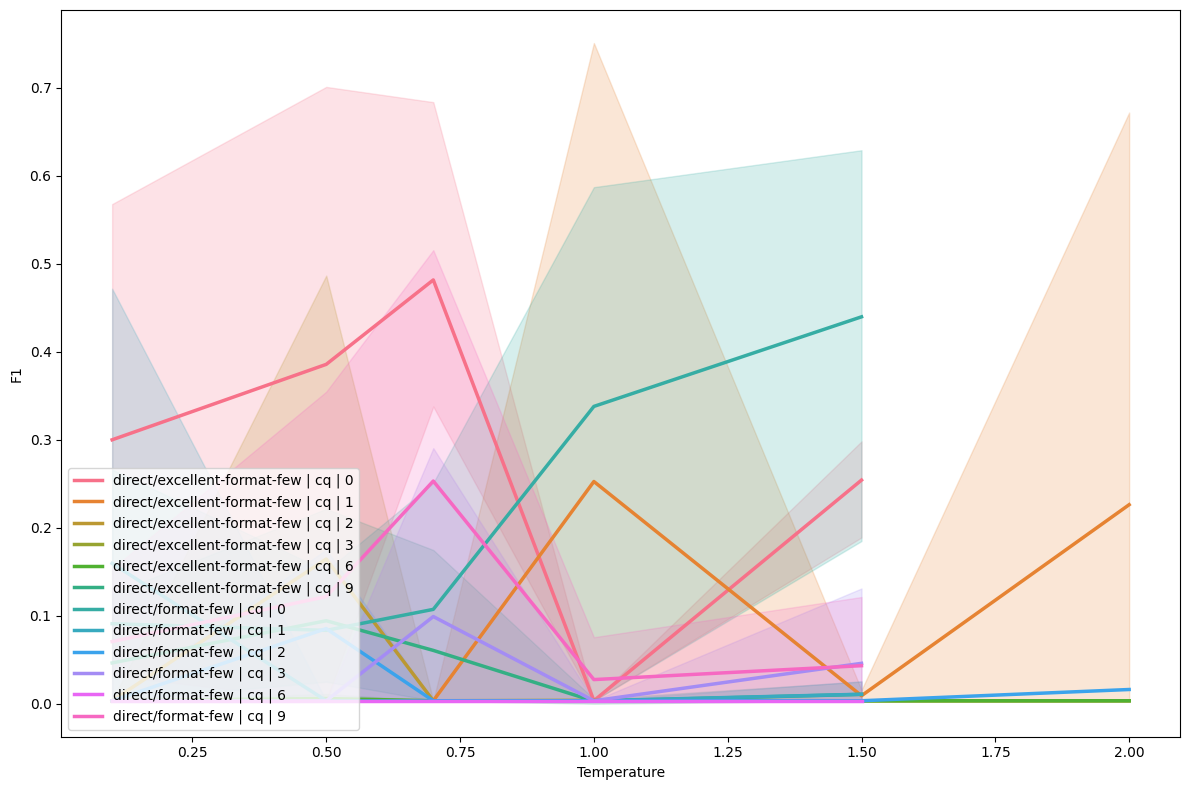

In [38]:
plot_variance(prepared_df, technique='direct', legend='brief')

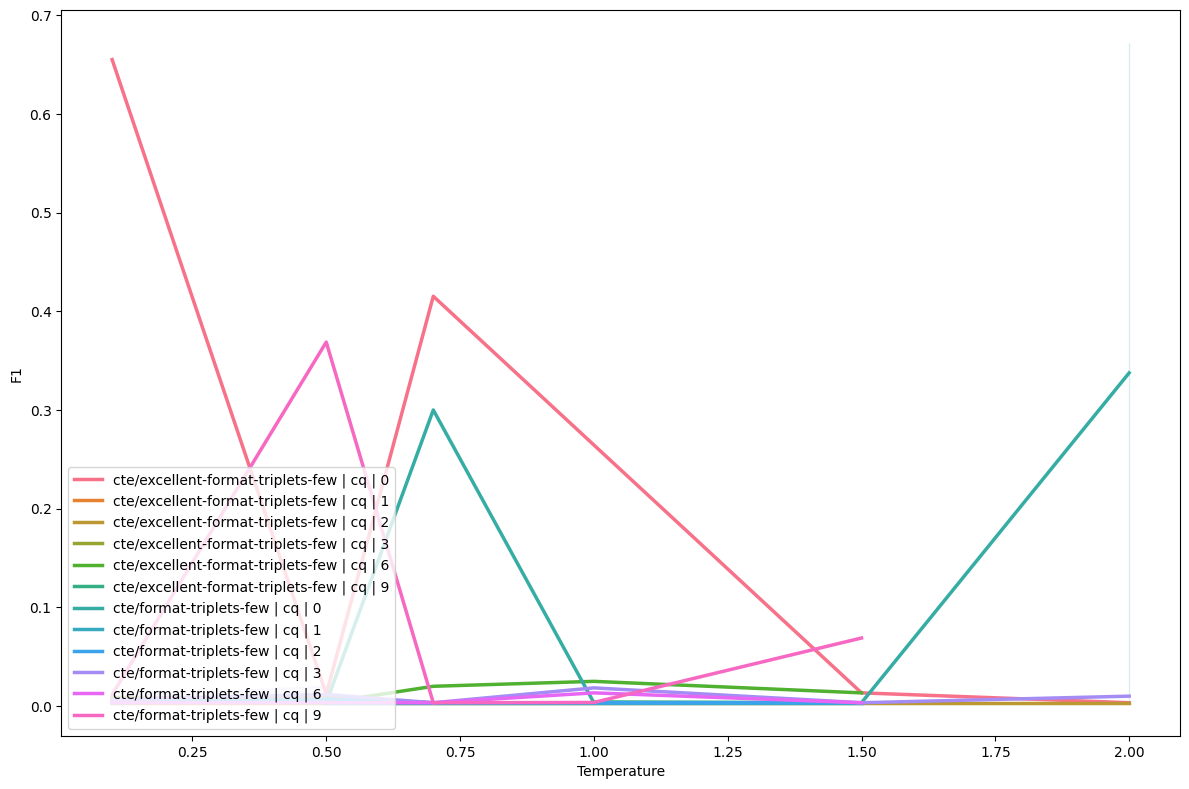

In [39]:
plot_variance(prepared_df, technique='cte', legend='brief')

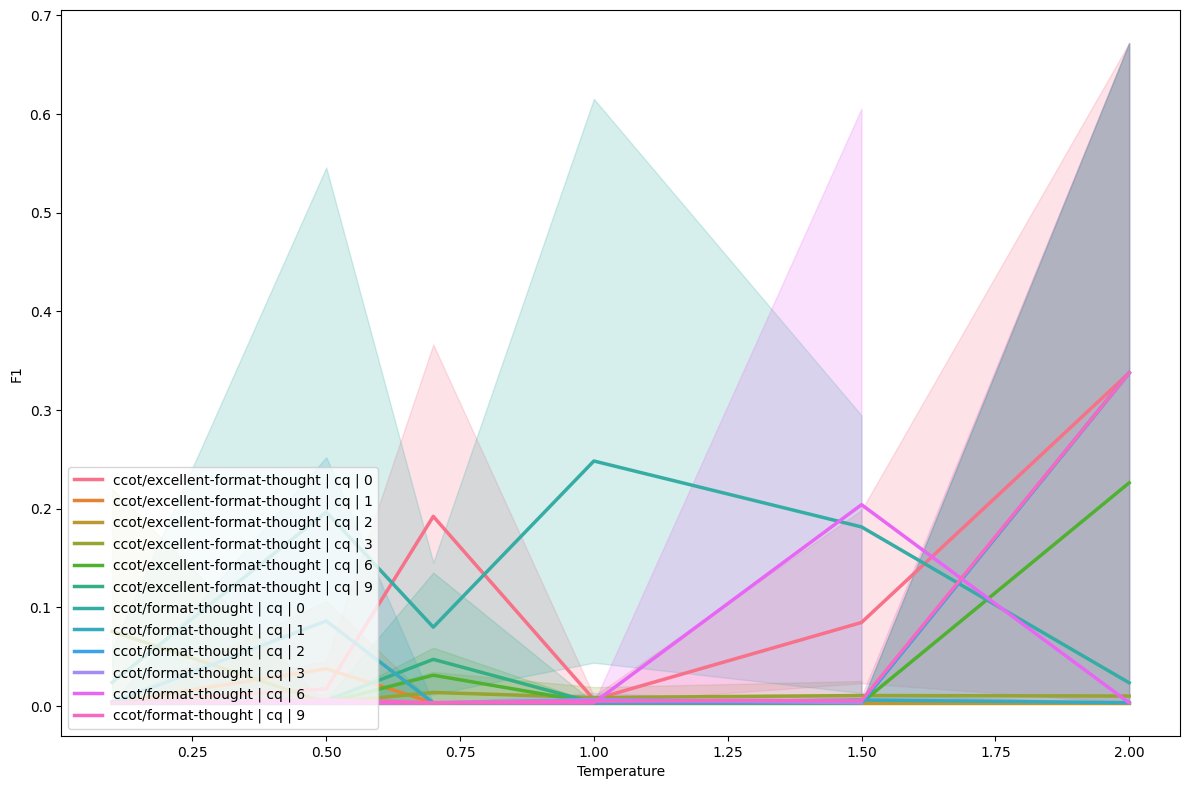

In [40]:
plot_variance(prepared_df, technique='ccot', legend='brief')

In [41]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
0,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.1,1,0.003333,0.003333,ccot/excellent-format-thought | cq | 0
1,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.1,2,0.003333,0.003333,ccot/excellent-format-thought | cq | 0
2,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.1,3,0.003333,0.003333,ccot/excellent-format-thought | cq | 0
3,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.5,1,0.003333,0.003333,ccot/excellent-format-thought | cq | 0
4,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.5,2,0.036667,0.045556,ccot/excellent-format-thought | cq | 0
5,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.5,3,0.003333,0.003333,ccot/excellent-format-thought | cq | 0
6,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.7,1,0.170000,0.206810,ccot/excellent-format-thought | cq | 0
7,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.7,2,0.003333,0.003333,ccot/excellent-format-thought | cq | 0
8,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,0.7,3,0.313333,0.366358,ccot/excellent-format-thought | cq | 0
9,ccot,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,1.0,1,0.003333,0.003333,ccot/excellent-format-thought | cq | 0


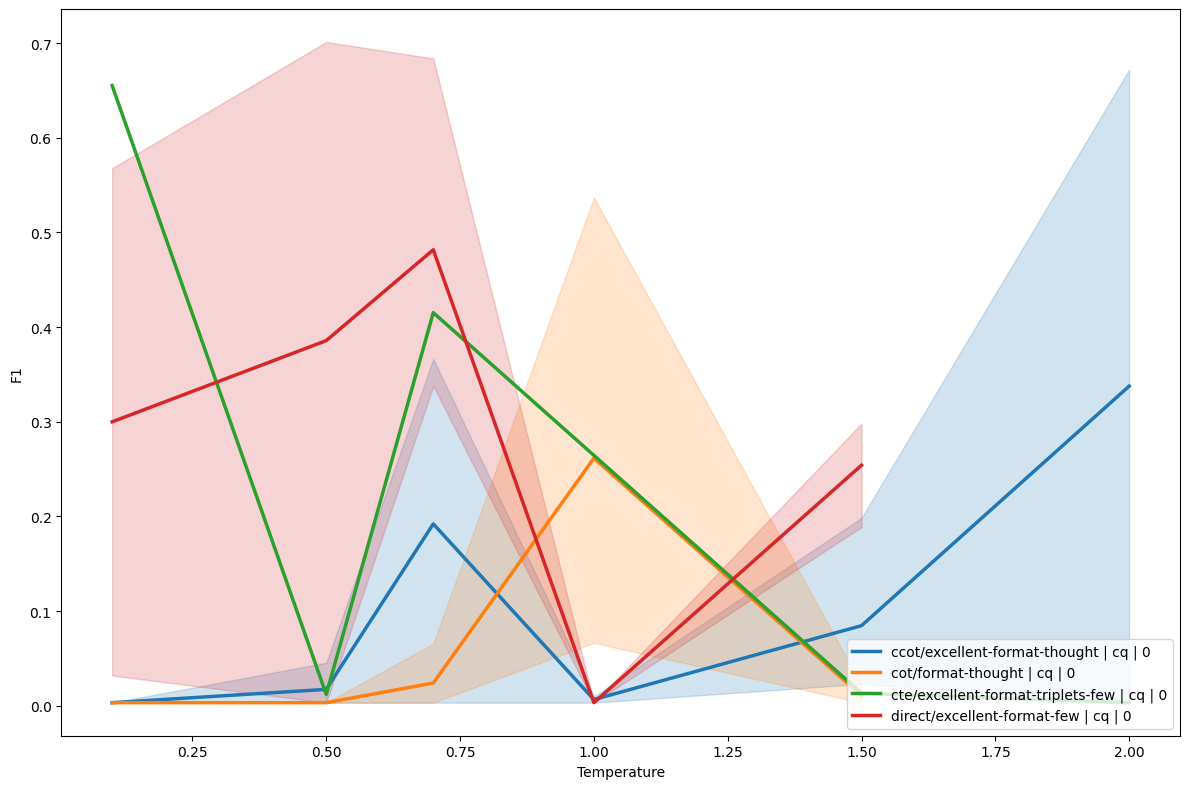

In [42]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

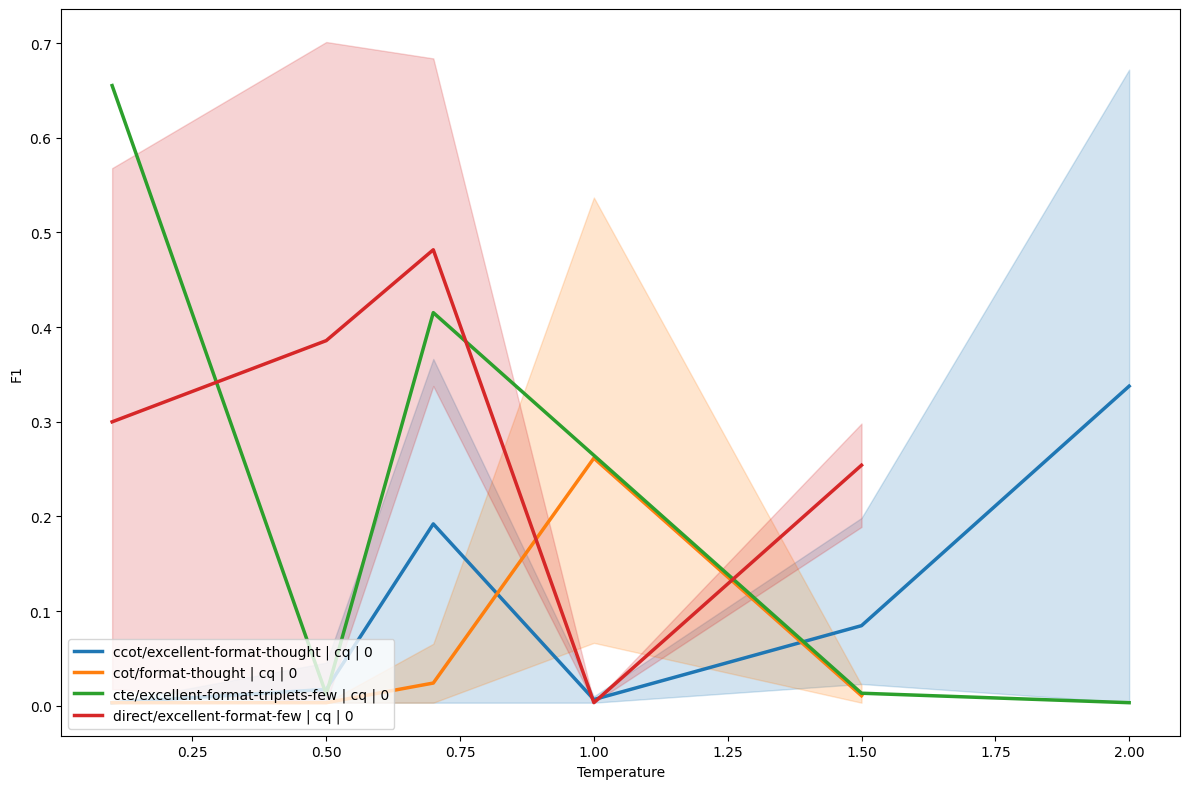

In [43]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

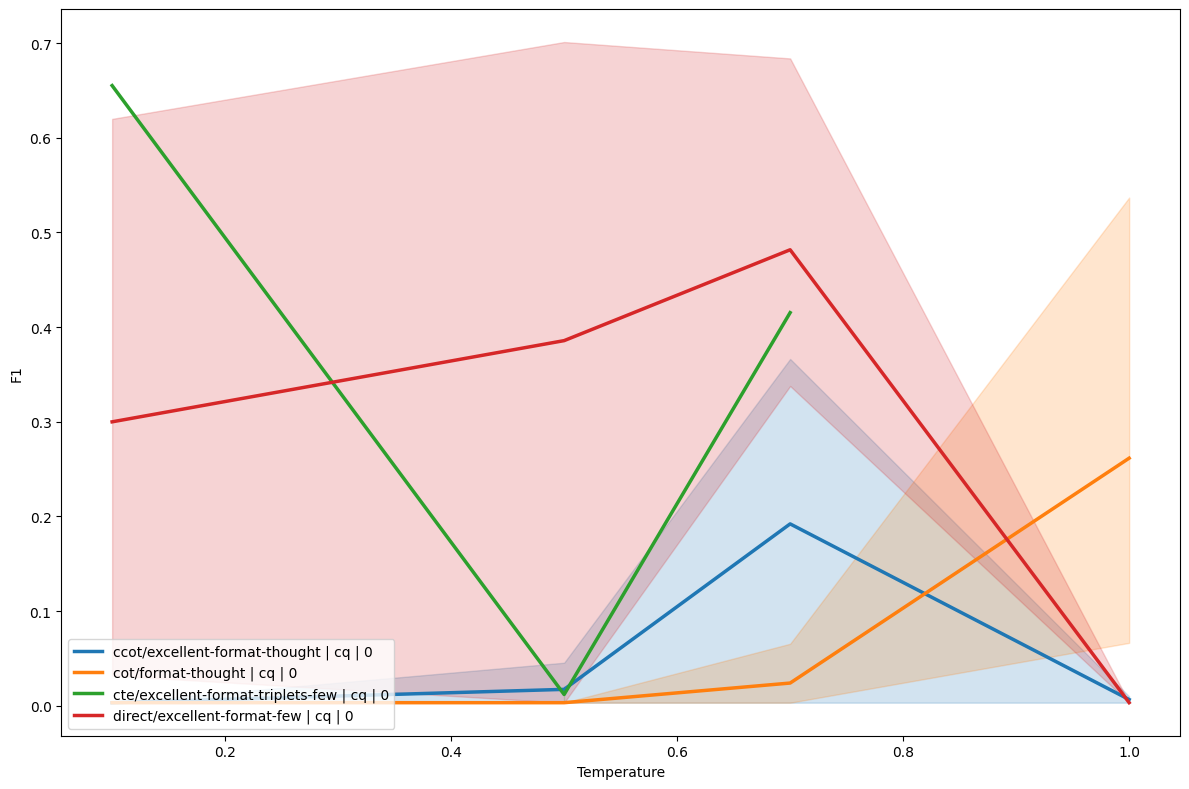

In [44]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

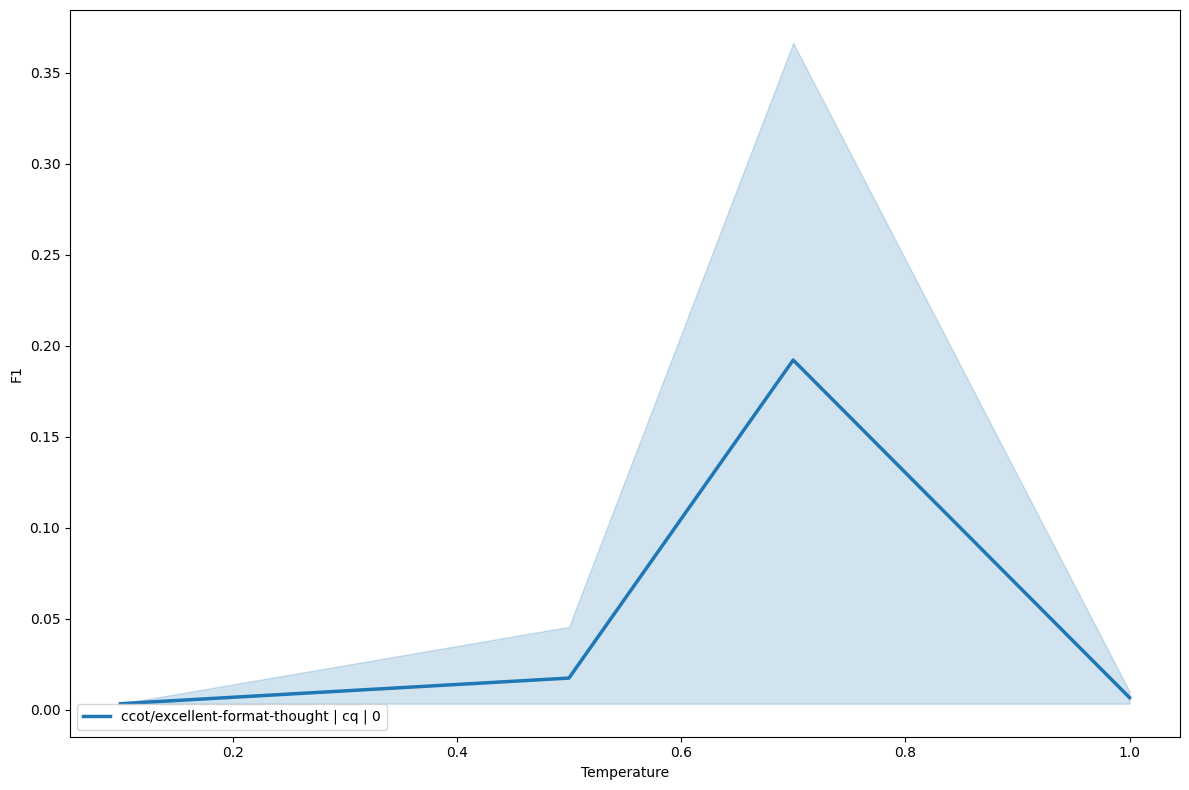

In [45]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='ccot', figsize=(12, 8), legend_loc='lower left')

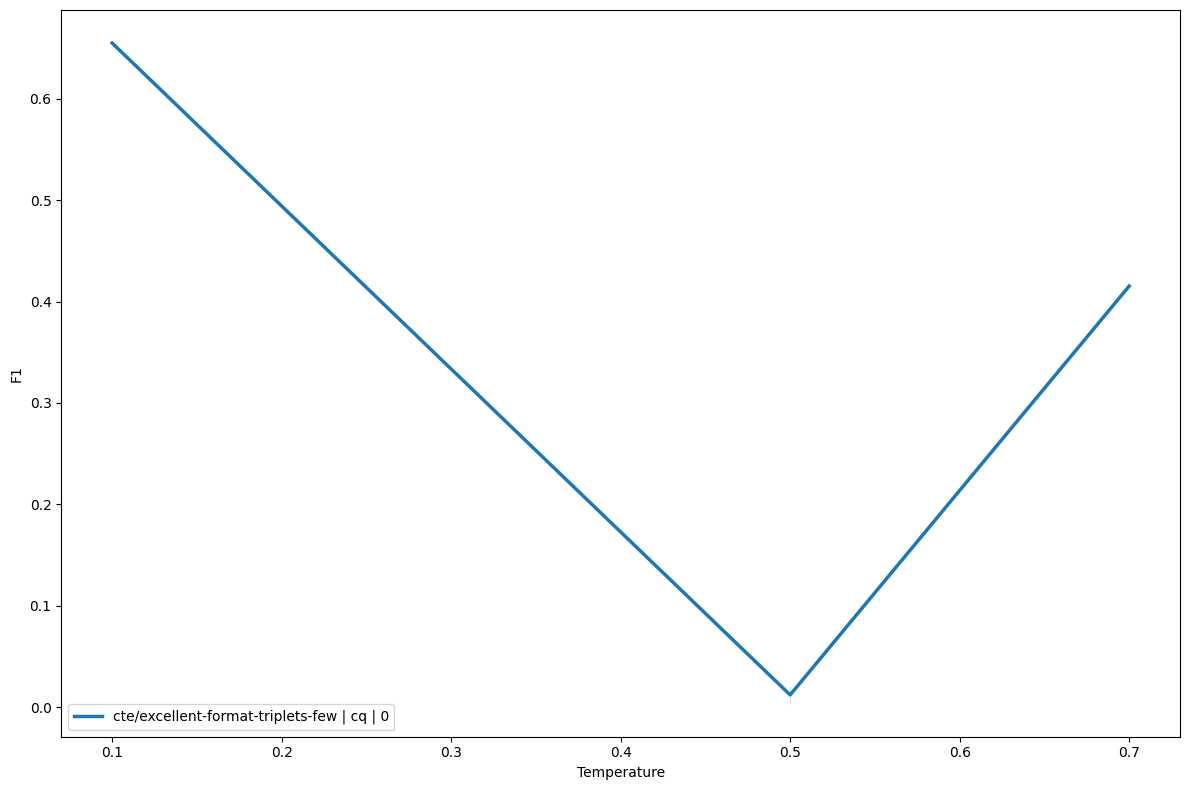

In [46]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='cte', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [47]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

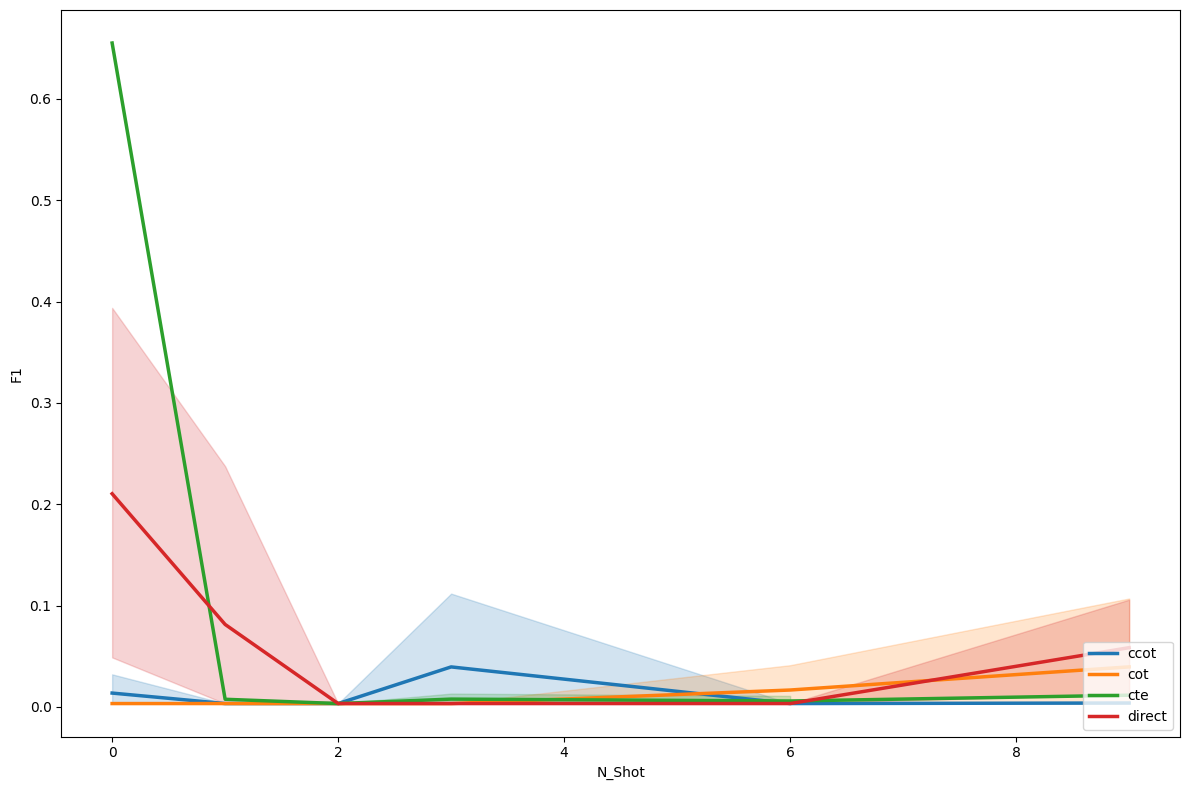

In [48]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

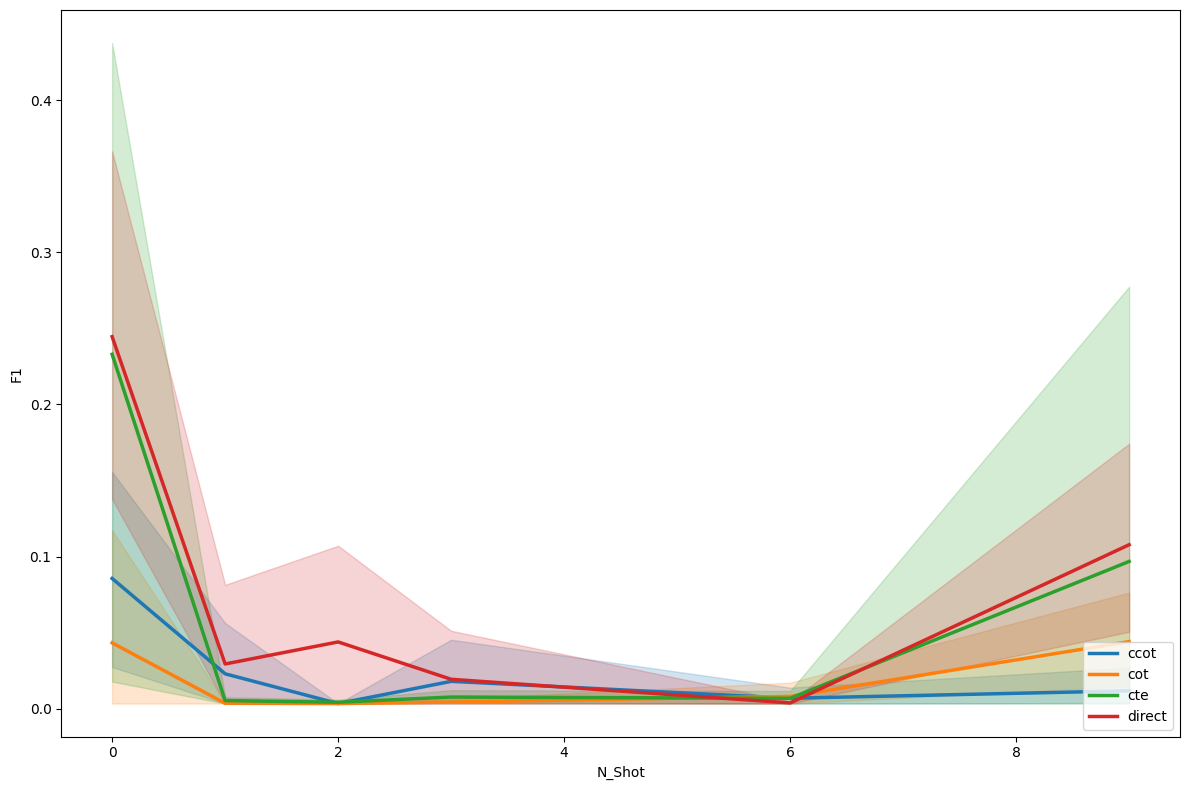

In [49]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [50]:
df

,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,0.1,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,1,0.003333,0.003333,0.01,0.010000,...,0.0,299,3.789298,12.840232,0,0.0,0.0,2.0,165,ccot
1,0.1,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,2,0.003333,0.003333,0.01,0.010000,...,4.0,299,1.719064,2.539884,0,1.0,1.0,1.0,27,ccot
2,0.1,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,3,0.003333,0.003333,0.01,0.010000,...,0.0,299,0.414716,0.691694,0,0.0,0.0,1.0,5,ccot
3,0.5,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,1,0.003333,0.003333,0.01,0.010000,...,0.0,299,4.193980,36.488793,0,0.0,0.0,0.0,440,ccot
4,0.5,ccot/excellent-format-thought,cq,auto-interweave/ccot,0,2,0.036667,0.045556,0.11,0.136667,...,62.0,287,1.787456,8.133939,0,0.0,0.0,0.0,66,ccot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,1.0,direct/format-few,cq,auto-interweave/direct,9,2,0.003333,0.003333,0.01,0.010000,...,4.0,299,18.414716,183.535474,0,1.0,2.0,3.0,3070,direct
627,1.0,direct/format-few,cq,auto-interweave/direct,9,3,0.003333,0.003333,0.01,0.010000,...,1.0,299,0.749164,1.164617,0,0.0,0.0,1.0,9,direct
628,1.5,direct/format-few,cq,auto-interweave/direct,9,1,0.003333,0.005002,0.01,0.015007,...,6.0,299,246.361204,742.243662,0,1.0,6.0,74.5,4374,direct
629,1.5,direct/format-few,cq,auto-interweave/direct,9,2,0.103333,0.121235,0.31,0.363705,...,14.0,264,54.825758,295.919859,0,2.0,6.0,16.0,3201,direct
